In [ ]:
# 23.04.01(토) 데분정 3주차 공부
# 125, 131 ~ 145, 150 ~ 163
# markdown으로 메모는 프젝에서만 할 예정

In [ ]:
# 125

# 선형 대수의 방정시 및 역행렬을 연산하는 함수는 다음과 같다.
# linalg.solve(a, b)                    - 선형 방정식을 푼다.
# linalg.tensorsolve(a, b[, axes])      - x에 대한 텐서 방정식 ax=b를 푼다.
# linalg.lstsq(a, b[, axes])            - 선형 방정식에 대한 최소 제곱법을 반환한다.
# linalg.inv(a)                         - 행렬의 역수를 계산한다.
# linalg.pinv(a[, rcond])               - 무어-펜로즈 유사 역행렬을 계산한다.
# linalg.tensorinv(a[, ind])            - N차원 배열의 역을 계산한다.

# 넘파이 적용
# open(), read(), write(), close().    ex. read_csv(), to_csv()

# 이진파일 처리 함수 - p126 ~ 참고.. 실제로 사용시에 직접 보고 사용이 맞을 듯 [못 외움]

In [1]:
# p131 메모리 맵 파일
import numpy as np

In [3]:
data = np.arange(12, dtype = 'float32')
data.resize((3, 4))
data

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)

In [4]:
from tempfile import mkdtemp
import os.path as path
fname = path.join(mkdtemp(), 'newfile.dat')
fname

'/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/tmp2ox7ssx1/newfile.dat'

In [14]:
fp = np.memmap(fname, dtype='float32', mode='w+', shape=(3, 4))
fp

memmap([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32)

In [15]:
fp[:] = data[:]
fp

memmap([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)

In [16]:
fp.filename = path.abspath(fname)
del fp

In [17]:
newfp = np.memmap(fname, dtype='float32', shape=(3, 4))
newfp

memmap([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)

In [18]:
fpr = np.memmap(fname, dtype='float32', mode='r', shape=(3, 4))
fpr.flags.writeable
# 데이터를 쓸 수 없이 읽기 전용이라는 뜻

False

In [19]:
fpc = np.memmap(fname, dtype='float32', mode='c', shape=(3, 4))
fpc.flags.writeable

True

In [20]:
fpc

memmap([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)

In [22]:
fpc[0,:] = 0
fpc

memmap([[ 0.,  0.,  0.,  0.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)

In [23]:
fpr

memmap([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)

In [26]:
fpo = np.memmap(fname, dtype='float32', mode='r', offset=16)
fpo

memmap([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.], dtype=float32)

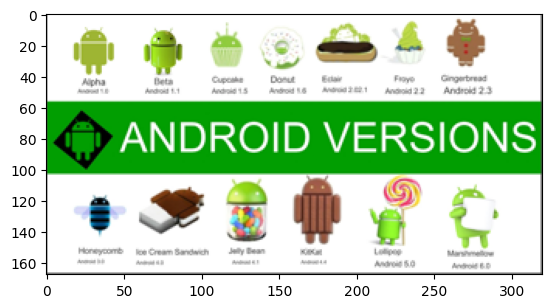

In [37]:
# 이미지 처리 p134 ~ 
# 이미지 어디서 다운받는지 몰라서 임의로 아무 사진이나 가져옴
import numpy as np
import matplotlib.pyplot as plt
arr1 = plt.imread('/Users/raekkkky/Desktop/DNA/Data_Analysis/python.png')
plt.imshow(arr1)

In [29]:
arr1.shape
# 책에서 예시는 맨 뒤에 4가 아닌 3이라서 밑에 진행 안됨 (4는 채널을 의미, 4개의 색상을 사용했다는 뜻)
# 책에서는 3개의 색상을 사용함 즉, RGB를 사용함

(168, 320, 4)

In [31]:
plt.show()

In [35]:
def togray(rgb):
    fil = [0.299, 0.587, 0.144]
    return np.dot(rgb, fil)

arr2 = togray(arr1)

plt.imshow(arr2, cmap='gray')
plt.show()

ValueError: shapes (168,320,4) and (3,) not aligned: 4 (dim 2) != 3 (dim 0)

In [38]:
# scipy.ndimage 패키지를 활용하면 다차원 이미지를 처리할 수 있다.
import scipy.misc
import matplotlib.pyplot as plt
face = scipy.misc.face()
face.shape

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_4251/1984896179.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = scipy.misc.face()


(768, 1024, 3)

In [39]:
face.max(), face.min(), face.mean()

(255, 0, 110.16274388631184)

In [40]:
face.dtype

dtype('uint8')

In [41]:
plt.gray()

<Figure size 640x480 with 0 Axes>

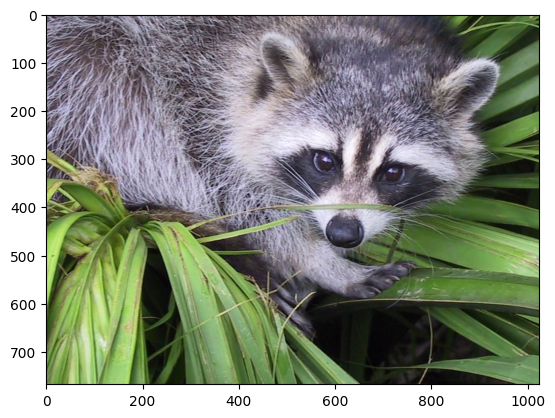

In [42]:
plt.imshow(face)

In [44]:
plt.show()

In [46]:
pip install imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
import imageio
imageio.imwrite('face.png', face)
face1 = imageio.imread('face.png')
type(face1)

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_4251/2121678843.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face1 = imageio.imread('face.png')


imageio.core.util.Array

In [49]:
face1.dtype, face1.shape

(dtype('uint8'), (768, 1024, 3))

In [52]:
face1.tofile('face1.raw')
arr = np.fromfile('face1.raw', dtype = np.uint8)
arr

array([121, 112, 131, ..., 118, 154,  92], dtype=uint8)

In [53]:
arr.shape

(2359296,)

In [54]:
arr.shape = (768, 1024, 3)
arr

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [55]:
arr1 = np.memmap('face1.raw', dtype = np.uint8, shape=(768, 1024, 3))
arr1.dtype, arr1.shape

(dtype('uint8'), (768, 1024, 3))

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_4251/77873024.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face1 = scipy.misc.face(gray = True)


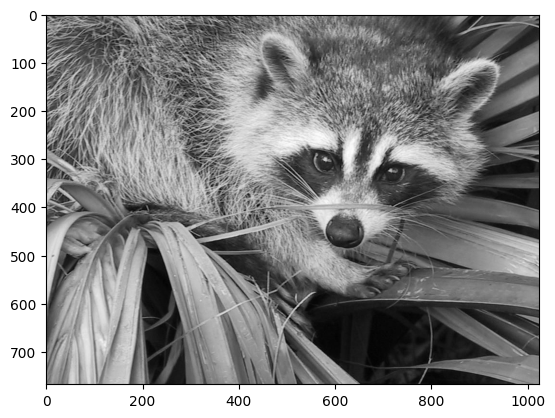

In [56]:
import scipy.misc
import matplotlib.pyplot as plt
face1 = scipy.misc.face(gray = True)
plt.imshow(face1, cmap = plt.cm.gray)

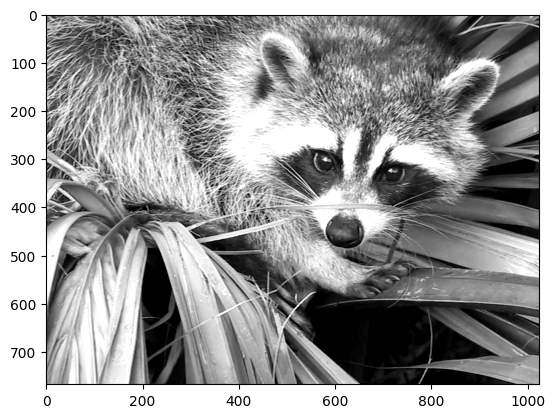

In [57]:
plt.imshow(face1, cmap = plt.cm.gray, vmin=20, vmax=200)

(0.0, 1.0, 0.0, 1.0)

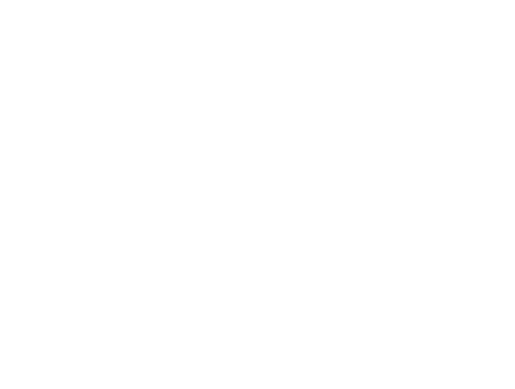

In [58]:
plt.axis('off')

In [60]:
plt.show()

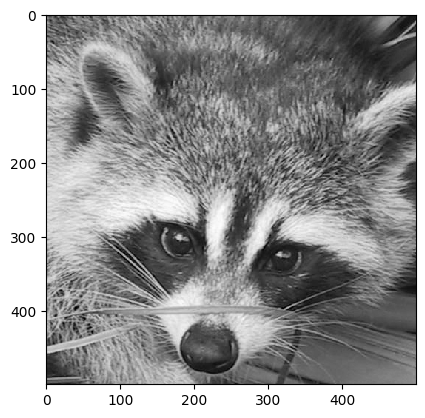

In [63]:
plt.imshow(face1[0:500, 400:900], cmap=plt.cm.gray, interpolation = 'nearest')
plt.show()

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_4251/1047338113.py:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  arr = scipy.misc.face(gray=True)


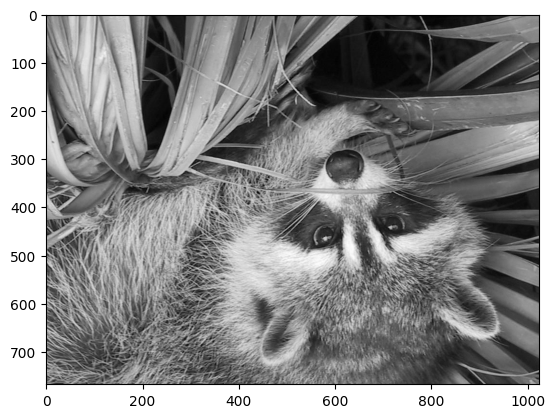

In [64]:
import numpy as np
import scipy.misc
import scipy.ndimage
import matplotlib.pyplot as plt
arr = scipy.misc.face(gray=True)
arr_flipud = np.flipud(arr)
arr_rotate = scipy.ndimage.rotate(arr, 45)
plt.imshow(arr_flipud, cmap=plt.cm.gray)
plt.show()

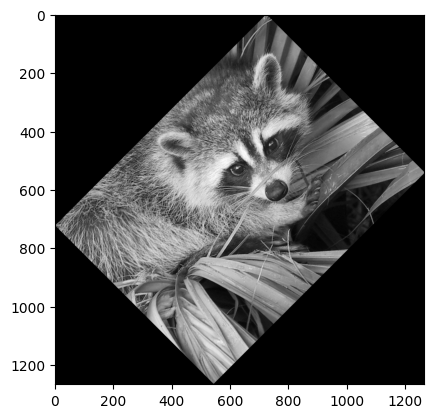

In [66]:
plt.imshow(arr_rotate, cmap=plt.cm.gray)
plt.show()

In [68]:
# 144p 이제 데이터 전처리에서 가장 많이 사용하는 판다스 라이브러리를 살펴볼 예정
# 150 ~ 163 진행 '데이터 프레임' 시작!!
import pandas as pd

In [70]:
d = {'one': pd.Series([1., 2., 3.], index = ['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index = ['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [72]:
df.info()
# df.info랑 df.info() 다름!! () 유무 조심하기!

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     4 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [73]:
df.dtypes

one    float64
two    float64
dtype: object

In [74]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [75]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns = ['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [76]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [77]:
df.columns

Index(['one', 'two'], dtype='object')

In [80]:
d = {'one': [1., 2., 3.], 'two': [3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,3.0
1,2.0,2.0
2,3.0,1.0


In [81]:
pd.DataFrame(d, index = ['a', 'b', 'c'])

,one,two
a,1.0,3.0
b,2.0,2.0
c,3.0,1.0


In [83]:
arr = np.zeros((2,), dtype = [('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
arr[:] = [(1, 2., 'hello'), (2, 3., 'World')]
arr

array([(1, 2., b'hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [84]:
pd.DataFrame(arr)

,A,B,C
0,1,2.0,b'hello'
1,2,3.0,b'World'


In [85]:
pd.DataFrame(arr, index = ['first', 'second'])

,A,B,C
first,1,2.0,b'hello'
second,2,3.0,b'World'


In [87]:
pd.DataFrame(arr, columns = ['C', 'A', 'B'])

,C,A,B
0,b'hello',1,2.0
1,b'World',2,3.0


In [88]:
data = [{'a':1, 'b':2}, {'a':5,'b':10, 'c':20}]
pd.DataFrame(data)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [89]:
pd.DataFrame(data, columns = ['a', 'b'])

,a,b
0,1,2
1,5,10


In [90]:
pd.DataFrame({('a', 'b'):{('A', 'B'):1, ('A', 'C'):2},
             ('a', 'a'):{('A', 'C'):3, ('A', 'B'):4},
             ('a', 'c'):{('A', 'B'):5, ('A', 'C'):6},
             ('b', 'a'):{('A', 'C'):7, ('A', 'B'):8},
             ('b', 'b'):{('A', 'D'):9, ('A', 'B'):10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [91]:
dict([('A', [1, 2, 3]), ('B', [4, 5, 6])])

{'A': [1, 2, 3], 'B': [4, 5, 6]}

In [92]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [94]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]), orient='index',
                      columns = ['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


In [95]:
arr

array([(1, 2., b'hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [96]:
pd.DataFrame.from_records(arr, index='C')

,A,B
C,,
b'hello',1,2.0
b'World',2,3.0


In [103]:
# 4.1.3 p156 ~ 행과 열의 기본 처리
# 우선 In[27]을 참고해서 만든 후 진행한다.
d = {'one': pd.Series([1., 2., 3.], index = ['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index = ['a', 'b', 'c', 'd'])}
df=pd.DataFrame(d)

In [104]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [106]:
df['two']

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

In [107]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [108]:
del df['two']
df.pop('three')

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [109]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [110]:
df['ha'] = 'hiho'
df

,one,flag,ha
a,1.0,False,hiho
b,2.0,False,hiho
c,3.0,True,hiho
d,NaN,False,hiho


In [111]:
df['trunced_one'] = df['one'][:2]
df

,one,flag,ha,trunced_one
a,1.0,False,hiho,1.0
b,2.0,False,hiho,2.0
c,3.0,True,hiho,NaN
d,NaN,False,hiho,NaN


In [112]:
df.insert(1, 'hi', df['one'])
df

,one,hi,flag,ha,trunced_one
a,1.0,1.0,False,hiho,1.0
b,2.0,2.0,False,hiho,2.0
c,3.0,3.0,True,hiho,NaN
d,NaN,NaN,False,hiho,NaN


In [113]:
ser = pd.Series(data=np.arange(3), index = ['A', 'B', 'C'])
ser

A    0
B    1
C    2
dtype: int64

In [114]:
ser.drop(labels = ['B', 'C'])

A    0
dtype: int64

In [115]:
df1 = pd.DataFrame(np.arange(12).reshape(3, 4), columns = ['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [116]:
df1.drop(['B', 'C'], axis = 1)

,A,D
0,0,3
1,4,7
2,8,11


In [117]:
df1.drop([0,1])

,A,B,C,D
2,8,9,10,11


In [119]:
df.loc['b']

one              2.0
hi               2.0
flag           False
ha              hiho
trunced_one      2.0
Name: b, dtype: object

In [120]:
df.iloc[2]

one             3.0
hi              3.0
flag           True
ha             hiho
trunced_one     NaN
Name: c, dtype: object

In [123]:
df = pd.DataFrame(np.random.randn(5, 4), columns = ['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(3, 3), columns = ['A', 'B', 'C'])
df+ df2

,A,B,C,D
0,-0.737352,-0.413226,0.069732,NaN
1,1.215611,-1.485978,0.121599,NaN
2,2.387982,-1.992752,1.045576,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [124]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.241988,-0.739578,1.362726,-1.584468
2,2.976689,-1.934409,0.027912,-1.444326
3,-0.033152,1.234951,0.364631,-1.916991
4,0.363402,0.602249,-0.349659,-2.853745


In [125]:
df * 10 + 2 

,A,B,C,D
0,-1.338845,-1.263687,4.766081,15.611193
1,1.081033,-8.659464,18.393339,-0.233489
2,28.428041,-20.607781,5.045197,1.167935
3,-1.670362,11.085825,8.412395,-3.558720
4,2.295179,4.758806,1.269494,-12.926255


In [126]:
df1 = pd.DataFrame({'a':[1,0,1], 'b':[0,1,1]}, dtype = bool)
df2 = pd.DataFrame({'a':[0,1,1], 'b':[1,1,0]}, dtype = bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [127]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [128]:
df1&df2

,a,b
0,False,False
1,False,True
2,True,False


In [129]:
df1|df2

,a,b
0,True,True
1,True,True
2,True,True


In [130]:
df1 ^ df2
# 이건 &로 나오는 결과의 반대라고 생각하면 됨

,a,b
0,True,True
1,True,False
2,False,True


In [131]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [133]:
df[:2].T
# 전치하는거임 (헹과 열을 바꿈)

,0,1
A,-0.333884,-0.091897
B,-0.326369,-1.065946
C,0.276608,1.639334
D,1.361119,-0.223349


In [ ]:
# 넘파이 함수들과 데이터프레임 연동

In [135]:
df3 = pd.DataFrame(np.arange(12).reshape(3,4), columns = ['A', 'B', 'C', 'D'])
np.exp(df3)

,A,B,C,D
0,1.000000,2.718282,7.389056,20.085537
1,54.598150,148.413159,403.428793,1096.633158
2,2980.957987,8103.083928,22026.465795,59874.141715


In [136]:
np.asarray(df3)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# 앞쪽 부분 지금까지 한 것 총 복습 혹은 다시 공부가 필요할 듯
# 판다스 부분은 예전에 학교에서 배운 내용과 비슷해서 나름 이해가 쉬웠음.